In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohanmeshram1","key":"b7ef94eb696989ad087108129c4aa570"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 93% 202M/218M [00:01<00:00, 220MB/s]
100% 218M/218M [00:01<00:00, 197MB/s]


In [4]:
!kaggle datasets download -d tongpython/cat-and-dog --unzip


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip cat-and-dog.zip -d cat-and-dog


Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import cv2

In [7]:
def count_images(directory):
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
  image_count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count
base_dir = '/content/cat-and-dog/training_set/training_set'
for entry in os.scandir(base_dir):
  if entry.is_dir():
    image_count = count_images(entry.path)
    print(f"{entry.name}: {image_count} images")

cats: 4000 images
dogs: 4005 images


In [8]:
def count_images(directory):
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
  image_count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count
base_dir = '/content/cat-and-dog/test_set/test_set'
for entry in os.scandir(base_dir):
  if entry.is_dir():
    image_count = count_images(entry.path)
    print(f"{entry.name}: {image_count} images")

cats: 1011 images
dogs: 1012 images


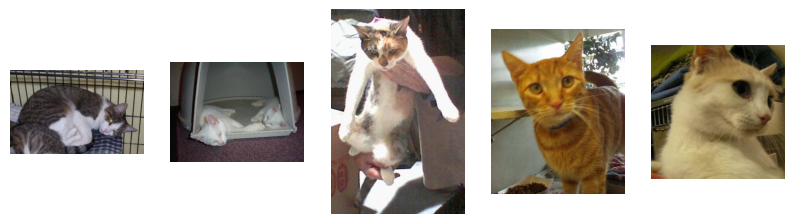

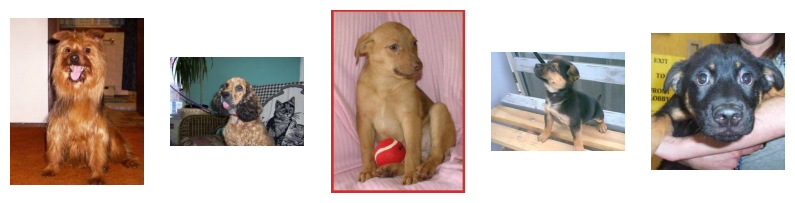

In [9]:
cats_dir = '/content/cat-and-dog/training_set/training_set/cats'
dogs_dir = '/content/cat-and-dog/training_set/training_set/dogs'

def display_images(directory, num_images):
  images = []
  for filename in os.listdir(directory)[:num_images]:
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
      images.append(os.path.join(directory, filename))

  plt.figure(figsize=(10, 5))
  for i, image_path in enumerate(images):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.show()

display_images(cats_dir, 5)

display_images(dogs_dir, 5)

# VGG19 MODEL

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
vgg19model = Model(inputs=base_model.input, outputs=x)

In [14]:
vgg19model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg19model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,447,425 (100.89 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/cat-and-dog/test_set/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [17]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [18]:
history = vgg19model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 70s 277ms/step - accuracy: 0.7547 - loss: 0.7338 - val_accuracy: 0.9088 - val_loss: 0.2555
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - accuracy: 0.8646 - loss: 0.3112 - val_accuracy: 0.9107 - val_loss: 0.2238
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 262ms/step - accuracy: 0.9067 - loss: 0.2284 - val_accuracy: 0.9132 - val_loss: 0.2084
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - accuracy: 0.9157 - loss: 0.1961 - val_accuracy: 0.9088 - val_loss: 0.2081
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 263ms/step - accuracy: 0.9153 - loss: 0.1913 - val_accuracy: 0.9157 - val_loss: 0.2024
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 263ms/step - accuracy: 0.9211 - loss: 0.1867 - val_accuracy: 0.9250 - val_loss: 0.1915
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 262ms/step - accuracy: 0.9332 - loss: 0.1500 - val_accuracy: 0.9026 - val_loss: 0.2255
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 263ms/step - accuracy: 0.9303 - loss: 0.1568 - val

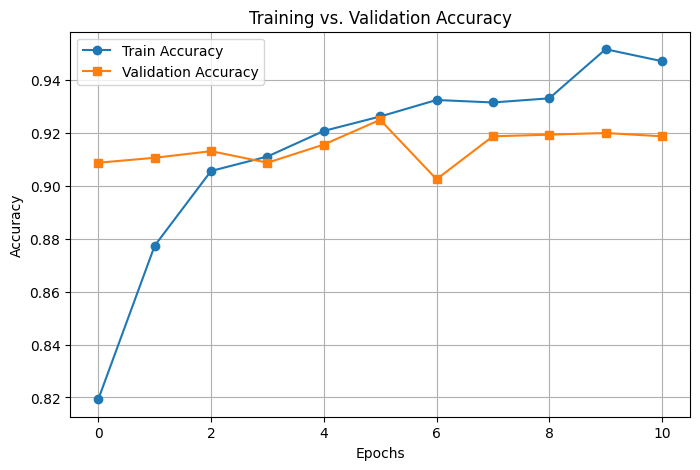

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
test_loss, test_acc = vgg19model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9217 - loss: 0.2035
Test accuracy: 0.9145


64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step


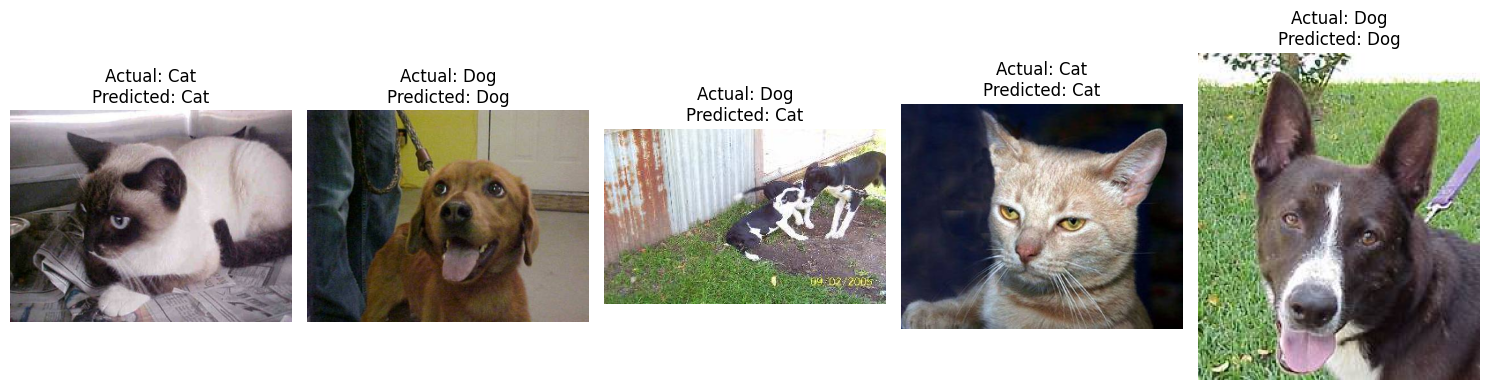

In [24]:
import matplotlib.pyplot as plt
import numpy as np
predictions = vgg19model.predict(test_generator)
predicted_classes = np.round(predictions).astype(int).flatten()
true_classes = test_generator.classes
filenames = test_generator.filenames
num_images_to_show = 5
random_indices = np.random.choice(len(filenames), size=num_images_to_show, replace=False)
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_indices):
    image_path = os.path.join('/content/cat-and-dog/test_set/test_set',filenames[index])
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {'Cat' if true_classes[index] == 0 else 'Dog'}\nPredicted: {'Cat' if predicted_classes[index] == 0 else 'Dog'}")
    plt.axis('off')

plt.tight_layout()
plt.show()